# Homework Assignment 6: Correlation Coefficient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('star_dataset.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### 1. Find two features in your dataset with more or less “linear-like” scatterplot.

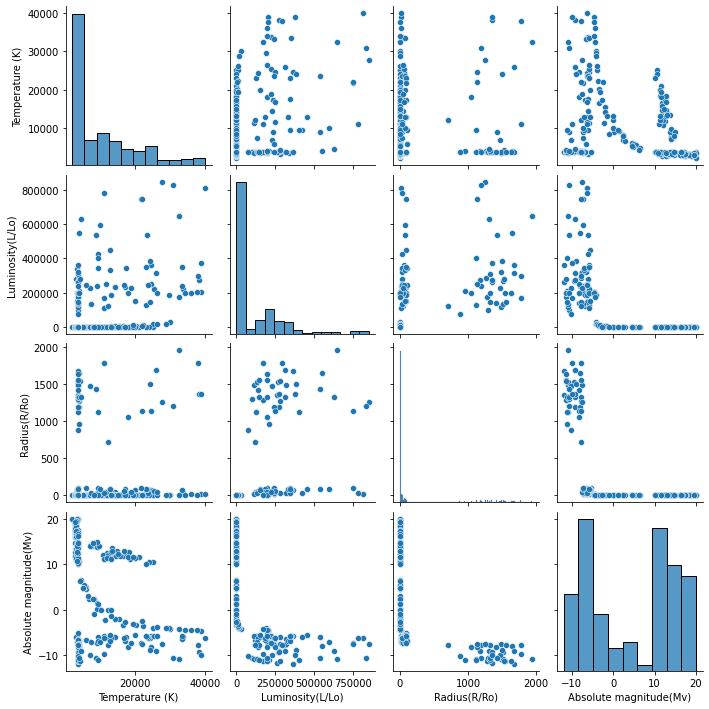

In [2]:
sns.pairplot(data=df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']])

**Temperature** and **absolute magnitude** has more linear-like scatterplot than other pairs.

### 2. Display the scatter-plot and comment how well it is suitable for building a linear regression.

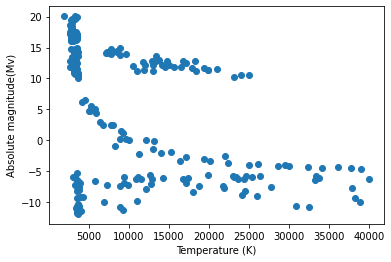

In [3]:
plt.scatter(df['Temperature (K)'], df['Absolute magnitude(Mv)'])
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
plt.show()

We have linear trend called **main sequence**, but also we have two clusters above and below the line.

### 3. Build a linear regression of one of the features over the other. Make a comment on the meaning of the slope.

In [4]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(df[['Temperature (K)']], df['Absolute magnitude(Mv)'])
print("y = {:.4}x + {:.4}".format(regr.coef_[0], regr.intercept_))

y = -0.0004634x + 9.247


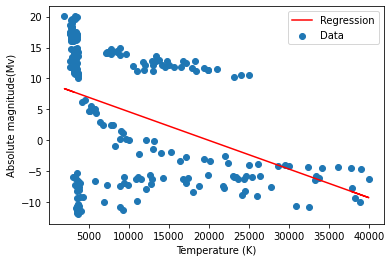

In [5]:
plt.plot(df[['Temperature (K)']], regr.predict(df[['Temperature (K)']]), color='r', label="Regression")
plt.scatter(df['Temperature (K)'], df['Absolute magnitude(Mv)'], label='Data')
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
plt.legend()
plt.show()

As we can see, the slope is negative, as it should be for the main sequence of stars.

### 4. Find the correlation and determinacy coefficients, and comment on the meaning of the latter.

**Correlation coefficients**

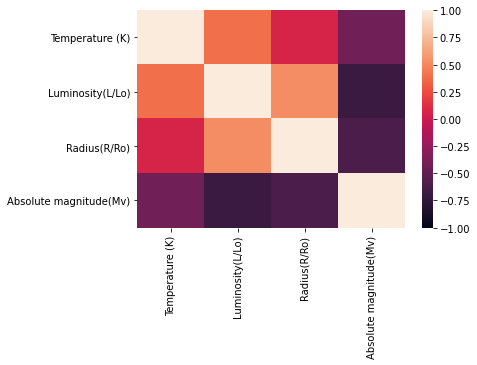

In [6]:
corr = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, vmin=-1, vmax=1);

In [7]:
print("Correlation coefficients for (Temperature (K), Absolute magnitude(Mv)): {:.4}".
      format((corr['Temperature (K)']['Absolute magnitude(Mv)'])))

Correlation coefficients for (Temperature (K), Absolute magnitude(Mv)): -0.4203


**Determinacy coefficients**

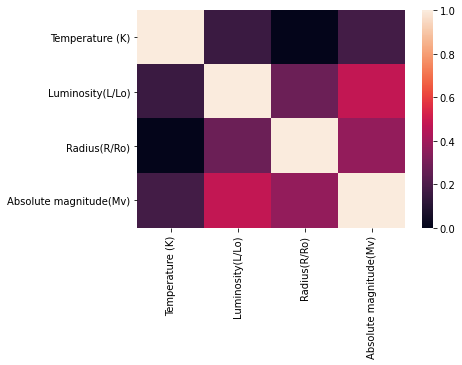

In [8]:
sns.heatmap(corr ** 2, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, vmin=0, vmax=1);

In [9]:
print("Determinacy coefficients for (Temperature (K), Absolute magnitude(Mv)): {:.4}".
      format((corr['Temperature (K)']['Absolute magnitude(Mv)'] ** 2)))

Determinacy coefficients for (Temperature (K), Absolute magnitude(Mv)): 0.1766


### 5. Make a prediction of the target values for given two or three predictor’ values; make a comment

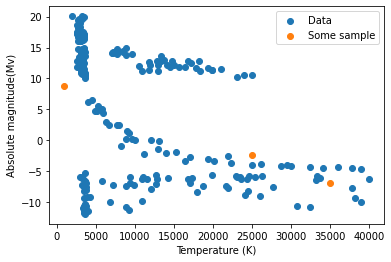

In [10]:
some_temperatures = np.array([1000, 25000, 35000])

plt.scatter(df['Temperature (K)'], df['Absolute magnitude(Mv)'], label='Data')
plt.scatter(some_temperatures, regr.predict(some_temperatures.reshape(-1, 1)), label='Some sample')
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
plt.legend()
plt.show()

Our model predicts well the absolute magnitude by temperature for the main sequence stars, but it is wrong if the star is from another cluster (for example giants above the main sequence or white dwarfs below this line).

### 6. Compare the mean relative absolute error of the regression on all points of your set and the determinacy coefficient and make comments

In [11]:
from sklearn.metrics import mean_absolute_error
y_true = df['Absolute magnitude(Mv)']
y_pred = regr.predict(df[['Temperature (K)']])

mrae = 100 * np.mean(np.absolute(np.divide(y_true - y_pred, y_true)))

print("MRAE {:.5}".format(mrae))

MRAE 354.95


Such a big mistake is due to the fact that our data contains, in addition to the main sequence of stars, other types.